## Assignment: Центральная предельная теорема своими руками

### Распределение Лапласа

Функция плотности вероятности:
$$f_x(x)=\frac{1}{2} e^{-|x|}$$

In [61]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [62]:
# Сгенерируйте из него выборку объёма 1000
sample = sts.laplace.rvs(size=1000)

Text(0.5, 0, '$x$')

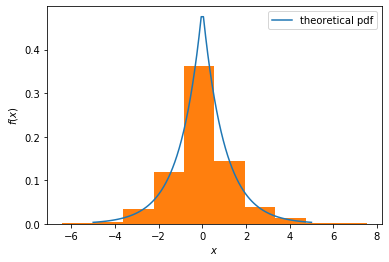

In [63]:
# постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

x = np.linspace(-5,5,100)
pdf = sts.laplace.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.hist(sample, bins=10, density=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [64]:
# при трёх и более значениях n  сгенерируйте 1000 выборок объёма n
n_sizes = np.array([5,10,50, 100])
num_of_samples = 1000

samples = {}

for n in n_sizes:
    samples[n] = []
    for j in range(num_of_samples):
        samples[n].append(sts.laplace.rvs(size=n))
        

Согласно ЦПТ  выборочные средние будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения

В случае распределение Лапласа
$\mathbb{E}X$ = 0
$\mathbb{D}X$ = 2

Распределение выборочных средних экспоненциального распределения будет приближаться нормальным распределением $N(\mu = 0, \sigma^2 = \frac{2}{n})$.


In [69]:
# Постройте гистограммы распределений их выборочных средних
# Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения 
means = {}
x = np.linspace(-2,2,100)
mu = 0 # theoretical expectation
sigma = (2./n) ** 0.5 # theoretical sigma
norm_rv = sts.norm(loc=mu, scale=sigma)

for n in n_sizes:
    means[n] = []
    for j in range(num_of_samples):
        means[n] = list(map(lambda arr: np.mean(arr), samples[n]))  

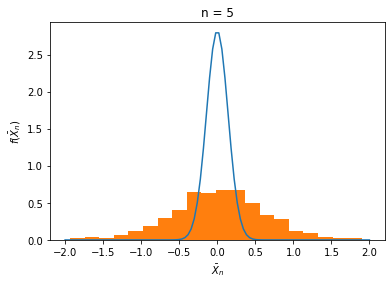

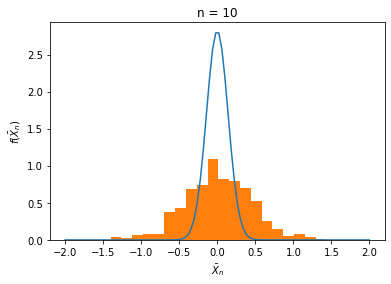

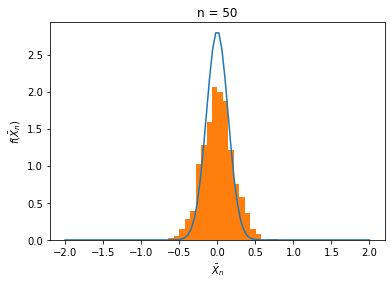

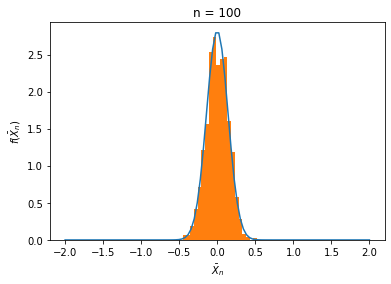

In [70]:
for m in means:
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)
    plt.hist(means[m], bins=20, density=True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % m)
    plt.show()



## Вывод

При n = 5 и n = 10 мы имеем большую дисперсию распределения выборочных средних. С ростом n распределение выборочных средних лучше соответствует нормальному распределению